# SCS 3546 Week 9 - Deep Generative Models

---
- **Learning Objectives:** After finishing this module the learners will:
    - have a general knowledge of the recent results in deep generative models
    - be familiarized with the explicit tractable density approaches like Fully Visible Belief Nets
    - acquire the techniques to build and train a basic GAN 
    - be informed of the shortcomings and difficulties of training GANs and some pointers to the new efforts in resolving these difficulties.
 
- **Topics:**
     - Intro to FVBN
         - PixelRNN
         - PixellCNN
     - Generative Adversarial Networks (GAN)
         - Background
         - *[Optional]* Mathematical Theroy behind GANs
         - Problems with GANs
         - Intro to a few types of GANs
             - Deep Convolutional GANs
             - Conditional GAN
             - Info GAN
         - Applications
 ---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Fully-Visible-Belief-Nets-(FVBN)" data-toc-modified-id="Fully-Visible-Belief-Nets-(FVBN)-2">Fully Visible Belief Nets (FVBN)</a></span><ul class="toc-item"><li><span><a href="#PixelRNN" data-toc-modified-id="PixelRNN-2.1">PixelRNN</a></span></li><li><span><a href="#PixelCNN" data-toc-modified-id="PixelCNN-2.2">PixelCNN</a></span></li></ul></li><li><span><a href="#Generative-Adversarial-Networks-(GAN)" data-toc-modified-id="Generative-Adversarial-Networks-(GAN)-3">Generative Adversarial Networks (GAN)</a></span><ul class="toc-item"><li><span><a href="#Vanila-GAN:-Demo" data-toc-modified-id="Vanila-GAN:-Demo-3.1">Vanila GAN: Demo</a></span></li><li><span><a href="#Issues-with-GANs:" data-toc-modified-id="Issues-with-GANs:-3.2">Issues with GANs:</a></span></li><li><span><a href="#Deep-convolutional-generative-adversarial-networks-(DCGAN)" data-toc-modified-id="Deep-convolutional-generative-adversarial-networks-(DCGAN)-3.3">Deep convolutional generative adversarial networks (DCGAN)</a></span></li><li><span><a href="#Conditional-GAN" data-toc-modified-id="Conditional-GAN-3.4">Conditional GAN</a></span></li><li><span><a href="#Info-GAN" data-toc-modified-id="Info-GAN-3.5">Info GAN</a></span></li></ul></li><li><span><a href="#Resources" data-toc-modified-id="Resources-4">Resources</a></span></li></ul></div>

## Introduction
In module 8 we introduced the concept of generative models and provided a taxonomic categorization of them based on their characteristics such as the explicit vs. implicit density estimation:

<figure>
    <img src="gan_img/Taxonomy.png" width="620">
    <figcaption>
        <center>[<b>Image credit:</b> Goodfellow, I. (2016), Generative Adversarial Networks - NIPS 2016 tutorial. </center><center>Retrieved from https://www.youtube.com/watch?v=HGYYEUSm-0Q ]</center></center></figcaption>
</figure>

We also introduced VAEs as a generative model that optimizes an intractable explicit function $p_{\phi}(z|x)$ and due to this intractability we defined a (tractable) density function $q_{\theta}(z|x)$ that approximated the density of the original. Finally we optimized the original data likelihood by optimizing its lower bound defined based on $q_{\theta}(z|x)$.

In this module we will see two other examples of generative models that have found a great deal of success in the past few years. First we will talk about another model from the explicit family **Fully Visible Belief Nets (FVBN)**, that have tractable density. And then we will move on to the Implicit class and talk about arguably one of the most active research areas of generative models: **Generative Adversarial Networks (GAN)**.

### Fully Visible Belief Nets (FVBN)
Let's get back to our image generation example, though our discussion can be applied to other domains: text, ... . The FVBNs use chain rule in order to decompose the density estimation $p(x)$ to a product of densities for individual pixels. The density of a single pixel is simply a 1-d distribution. However, as we saw in our Naive Bayes example, assumption of i.i.d between pixels is a limiting assumption, so in FVBNs the density for each pixel $x_i$ is conditioned over all the pixel values that come before it: $p(x_i \mid x_1, x_2, \ldots, x_{i-1})$. So the likelihood of image $x$ is:

\begin{equation}
p(x) = \prod_{i=1}^{n} p(x_i \mid x_1, x_2, \ldots, x_{i-1})
\end{equation}

Given the above, we maximize the likelihood over our training data. The individual conditional distributions can be very complex in domains such as image. As we saw in the VAE module, we can model these complex distributions using neural networks, but we have to see what kind of neural network is well suited for this task. Also, we have to impose some ordering on the pixels, so that it is clear what we mean by a pixel coming *before* another in the above equation. Our choice of answers to the above questions lead to two architectures that we discuss here: **PixelRNN** and **PixelCNN**.

### PixelRNN
PixelRNN regards the image as a grid of pixels and each pixel value is conditioned on the value of its neighbors to the left and top: $x_{(i, j)} \mid x_{(i-1, j)}, x_{(i, j-1)}$. But then these two neighbors are conditioned on their own neighbors to the left and to the top:

<img src="gan_img/PixelRNN.png" width="300">

<p> So we can see a sequence of these dependencies for any given pixel value, going back all the way to the initial pixels. As we saw in previous module, RNNs and in particular LSTMs are well-suited to capture these kind of sequential dependencies. We won't get into the technical model details here but using LSTMs and residual connections for faster convergence speed and more direct signal propagation through the network, this model can generate samples. Here we see the result on CIFAR-10 and ImageNet 32x32:</p>

<br>
<figure>
    <img src="gan_img/PixelRNN_res.png" width="900">
    <figcaption>
        <center>Samples from models trained on CIFAR-10 (left) and ImageNet 32x32 (right) images.</center>
        <center>[<b>Image credit:</b> Van Den Oord, A., Dieleman, S., Zen, H., Simonyan, K., Vinyals, O., Graves, A., ... & Kavukcuoglu, K. (2016, September). WaveNet: A generative model for raw audio. In SSW (p. 125).]</center></figcaption>
</figure>

A technical observation is that the prediction values for the pixels are modeled as discrete values (due to some performance considerations) and are limited between 0 to 256 (for each of the 3 RGB channels). The distribution is modeled as a multinomial distribution and a softmax layer is used to capture that.

During training, the distributions over pixel values are calculated in parallel, however because of the recurrent networks that are used, the generation of the value is inherently sequential which makes image generation slow. Compare that to VAEs (and later with GANs) where pixels are generated in parallel. 

### PixelCNN
The *receptive field* of PixelCNNs can go far back in the image and in theory, they can be unbounded so the state of each pixel has to be calculated sequentially. PixelCNN solves this problem by limiting the receptive field by using convolutional layers to bound the pixels that the current pixel is conditioned on:

<br>
<figure>
    <img src="gan_img/PixelCNN.png" width="600">
    <figcaption>
        <center> [<b>Image credit:</b> Oord, A. V. D., Kalchbrenner, N., Vinyals, O., Espeholt, L., Graves, A., & Kavukcuoglu, K. (2016, December). </center><center>Conditional image generation with pixelcnn decoders. In Proceedings of the 30th International Conference on Neural Information Processing Systems (pp. 4797-4805). Curran Associates Inc.]</center></figcaption>
</figure>

We can see that for any given pixel a bounded neighborhood of it is mapped to predictions over the value of that pixel. Note that in this architecture, we are still conditioning the pixel value prediction on a large number of pixels. But this is no longer unbounded, as we can specify the size of the convolution. Also, the convolution that is used here is filtered (image on the right) so that the network does not peek into the values of the pixels that come after it in the sequence (strictly to the right and bellow).

The result is that during training PixelCNN is faster than PixelRNN, but image generation is still sequential, as the predicted value of a pixel is fed back into the network to predict the value of the pixels that come after it. So the generation is still slow.

Here is a few class-conditioned generated samples from the original paper:

<br>
<figure>
    <img src="gan_img/PixelCNN_res.png" width="800">
    <figcaption>
        <center> [<b>Image credit:</b> Oord et al. (2016, December). Conditional image generation with pixelcnn decoders. </center><center>In Proceedings of the 30th International Conference on Neural Information Processing Systems (pp. 4797-4805). Curran Associates Inc.]</center></figcaption>
</figure>

## Generative Adversarial Networks (GAN)
We know that if we had access to the true data distribution $P_{data}(x)$ we could sample from that distribution in order to generate new samples, however there is no direct way to do this as typically this distribution is complex and high-dimensional. What if we could instead sample from a random noise (e.g. Normal distribution) and then learn to transform that to $P_{data}(x)$. Neural networks are a prime candidate to capture functions with high complexity and we can use to to capture this transformation. This is exactly what the <font color='#c92d39'>**Generative Adversarial Networks (GANs)**</font> do. They train the transformer network or **Generator** along with another network, called the **Discriminator**, in a game theoretic way. Going back to our image generation example:

- The Generator network ($G$), tries to fool the discriminator in thinking that the generated images are real,meaning that they are taken from $P_{data}$, and
- The Discriminator network ($D$), tries to differentiate between real ($x\sim P_{data}$) and fake images.

This concept is captured in the image bellow:

<img src="gan_img/GAN.png" width="700">

Random noise is fed into the Generator that transforms it into a "fake image". The Discriminator is fed both from the training set images ($p_{data}(x)$) and the fake images coming from the Generator and it has to tell them apart. The idea behind GAN, is to train both of these networks alternatively to do the best they can in generating and discriminating images. The intuition is that by improving one of these networks, in this game theoretic manner, the other network has to do a better job to win the game, and that in turn improves its performance and this loop continues.

<div class="alert alert-block alert-warning"><b>The math under the hood:</b> Let's formalize the above notion and construct the two loss functions for the alternating training phases. The real images $x$ are sampled from $x\sim p_{data}$. The fake images are sampled from a simpler distribution $z\sim p(z)$, such as Gaussian, and are then transformed by the Generator to look like real images: $G(z)$. Imagine that we are the discriminator. What we want, is to maximize our likelihood of being able to identify real images: $0\le D(x)\le1$. At the same time, we want to minimize our likelihood of mistaking a fake image $D(G(z))$. In other words we want $D(x)$ to be closer to 1 and $D(G(z))$ be closer to 0. More importantly, we want to be able to do that for *all* real and fake images. So in a sense we want to increase the expectation of our discriminative ability over all samples, real or fake: </p>

<img src="gan_img/loss_inside.png" width="500">

<p>Being the discriminator, the first term captures the expectation of us being able to identify real samples, taken from $p_{data}(x)$. For the fake images, we want to minimize $D(G(z))$, by bringing it as close as possible to 0, which is similar to bringing $1 - D(G(z))$ closer to 1. Notice that we have replaced likelihood with log-likelihood in the above formulation. </p>

<p>The $\theta_d$ and $\theta_g$ are the parameters of the discriminator and the generator (in that order) which we would like to learn. The discriminator's winning strategy is to set $\theta_d$ in order to maximize the above formula. However, the generator wants the opposite: It wants to sabotage discriminator's win by setting its own parameters $\theta_g$ in order to minimize the above formula. The overall objective function can be expressed as the following minmax optimization problem:</p>

<img src="gan_img/loss_full.png" width="500">
<br>
<p>We solve this problem by alternatingly training the generator and the discriminator, with these loss functions:</p>

<p>
- **Gradient Ascent** using Generator's loss function: <img style="display:inline-block" src="gan_img/loss_g.png" width="250">.</p>
<p>
- **Gradient Descent** using Discriminator's loss function: <img style="display:inline-block" src="gan_img/loss_d.png" id="loss_d" width="430">.</p>


</div>

### Vanila GAN: Demo

Now that we have got the theory out of the way, we can start to role one of these networks. Following the advice of the co-inventor of GANs, __[Ian Goodfellow](https://arxiv.org/pdf/1406.2661.pdf)__, we will move away from the regular MNIST dataset and use the __[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist#get-the-data)__. Fashion-MNIST is a set of $28\times 28$ gray-scale images of 10 different classes of clothing items. This dataset is considered a harder dataset than regular MNIST, while still being simple enough for benchmarking and proof of concept purposes. Feel free to change the dataset back to MNIST, in order to compare the samples generated by GAN with those of the VAE's and Autoencoders of Module 8.

First let's show a few samples from this new dataset so that we know what to expect from the generator:

<IPython.core.display.Javascript object>


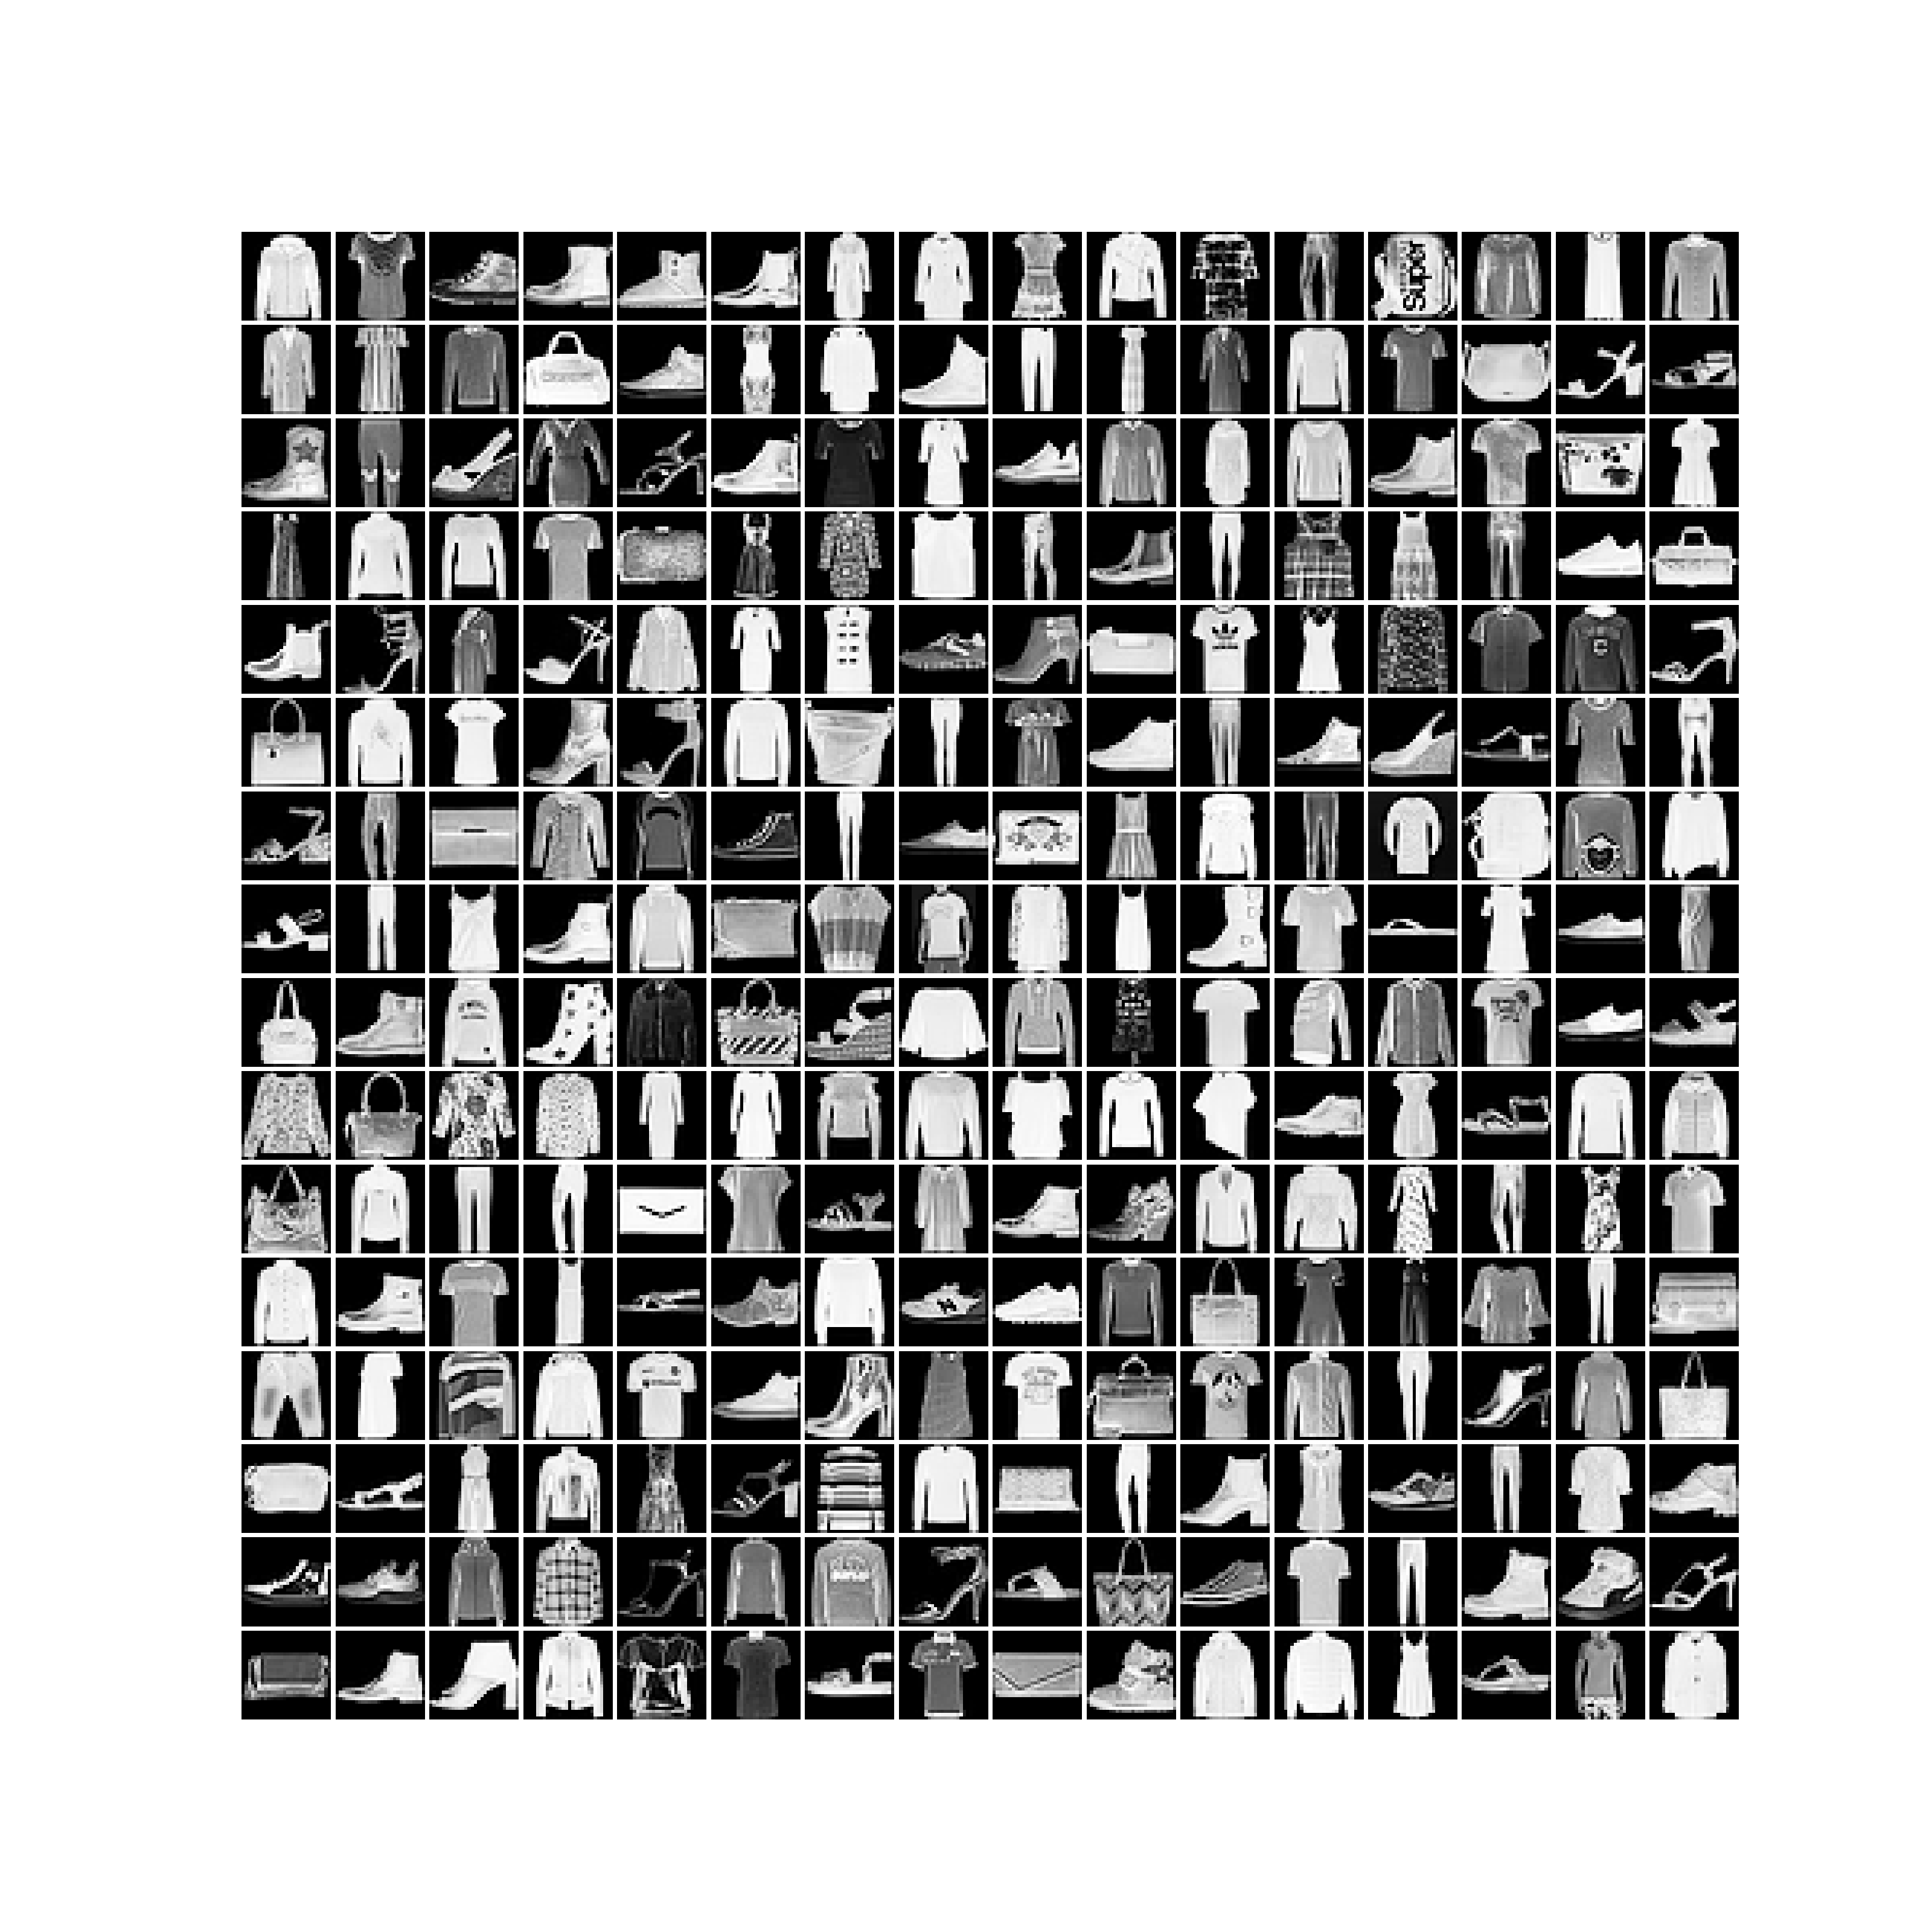

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [16]:
import numpy as np

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot(samples, gs):
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        ax.clear()
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

no_samples = 16
fig = plt.figure(figsize=(no_samples, no_samples))
gs = gridspec.GridSpec(no_samples, no_samples)
gs.update(wspace=0.05, hspace=0.05)

# Uncomment this line to switch back to mnist digit dataset
# mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)
mnist = input_data.read_data_sets('data/fashion', one_hot=True)
init_img = mnist.train.images[:no_samples*no_samples]
plot(init_img, gs)
fig.canvas.draw()

In [3]:
%matplotlib notebook

# Build the discriminator with the reuse flag. This comes handy later when we build the network
# We also name our layers using variable scope so that we can access their weights/biases during optimization
def discriminator(x, reuse=False):
    with tf.variable_scope('disc', reuse=reuse):
        h0 = tf.layers.dense(x, 128, tf.nn.relu)
        logit = tf.layers.dense(h0, 1)

        return logit

# Build the generator
def generator(z):
    with tf.variable_scope('gen'):
        h0 = tf.layers.dense(z, 128, tf.nn.tanh)
        G_prob = tf.layers.dense(h0, 784, tf.nn.sigmoid)

        return G_prob

# Noise sampling function.
# Exercise: Try to replace the 1-D uniform noise with 1-D and 2-D normal 
# noise and see the effect on the training performance
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

# Always a good practice to reset the default graph in a notebook!
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 784]) # Input placeholder
Z = tf.placeholder(tf.float32, shape=[None, 100]) # Noise placeholder

# Do the wiring...
G_sample = generator(Z)
# Since we call the discriminator() twice, we need to send the reuse=True the second time.
# Otherwise, TF thinks that we want two copies of the network and the weights wouldn't 
# be shared. By setting reuse='True', we indicate that there are two inputs to the SAME
# discriminator network. One from the generator and one from the training data.
D_logit_real = discriminator(X)
D_logit_fake = discriminator(G_sample, reuse=True)

# Setting up the losses.
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

Notice that we compare the discriminator logits (layer before sigmoid) at the end of the last cell.

**Exercise:** Write a new loss function that uses GAN's original discriminator loss function that we discussed [before](#loss_d). *Hint: Instead of logit, the discriminator has to output a 'fake'/'real' label so add a sigmoid layer at the end of the discriminator to do that. Afterwards, you still need to change the above loss functions to mimic the discriminator loss in the link.*

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


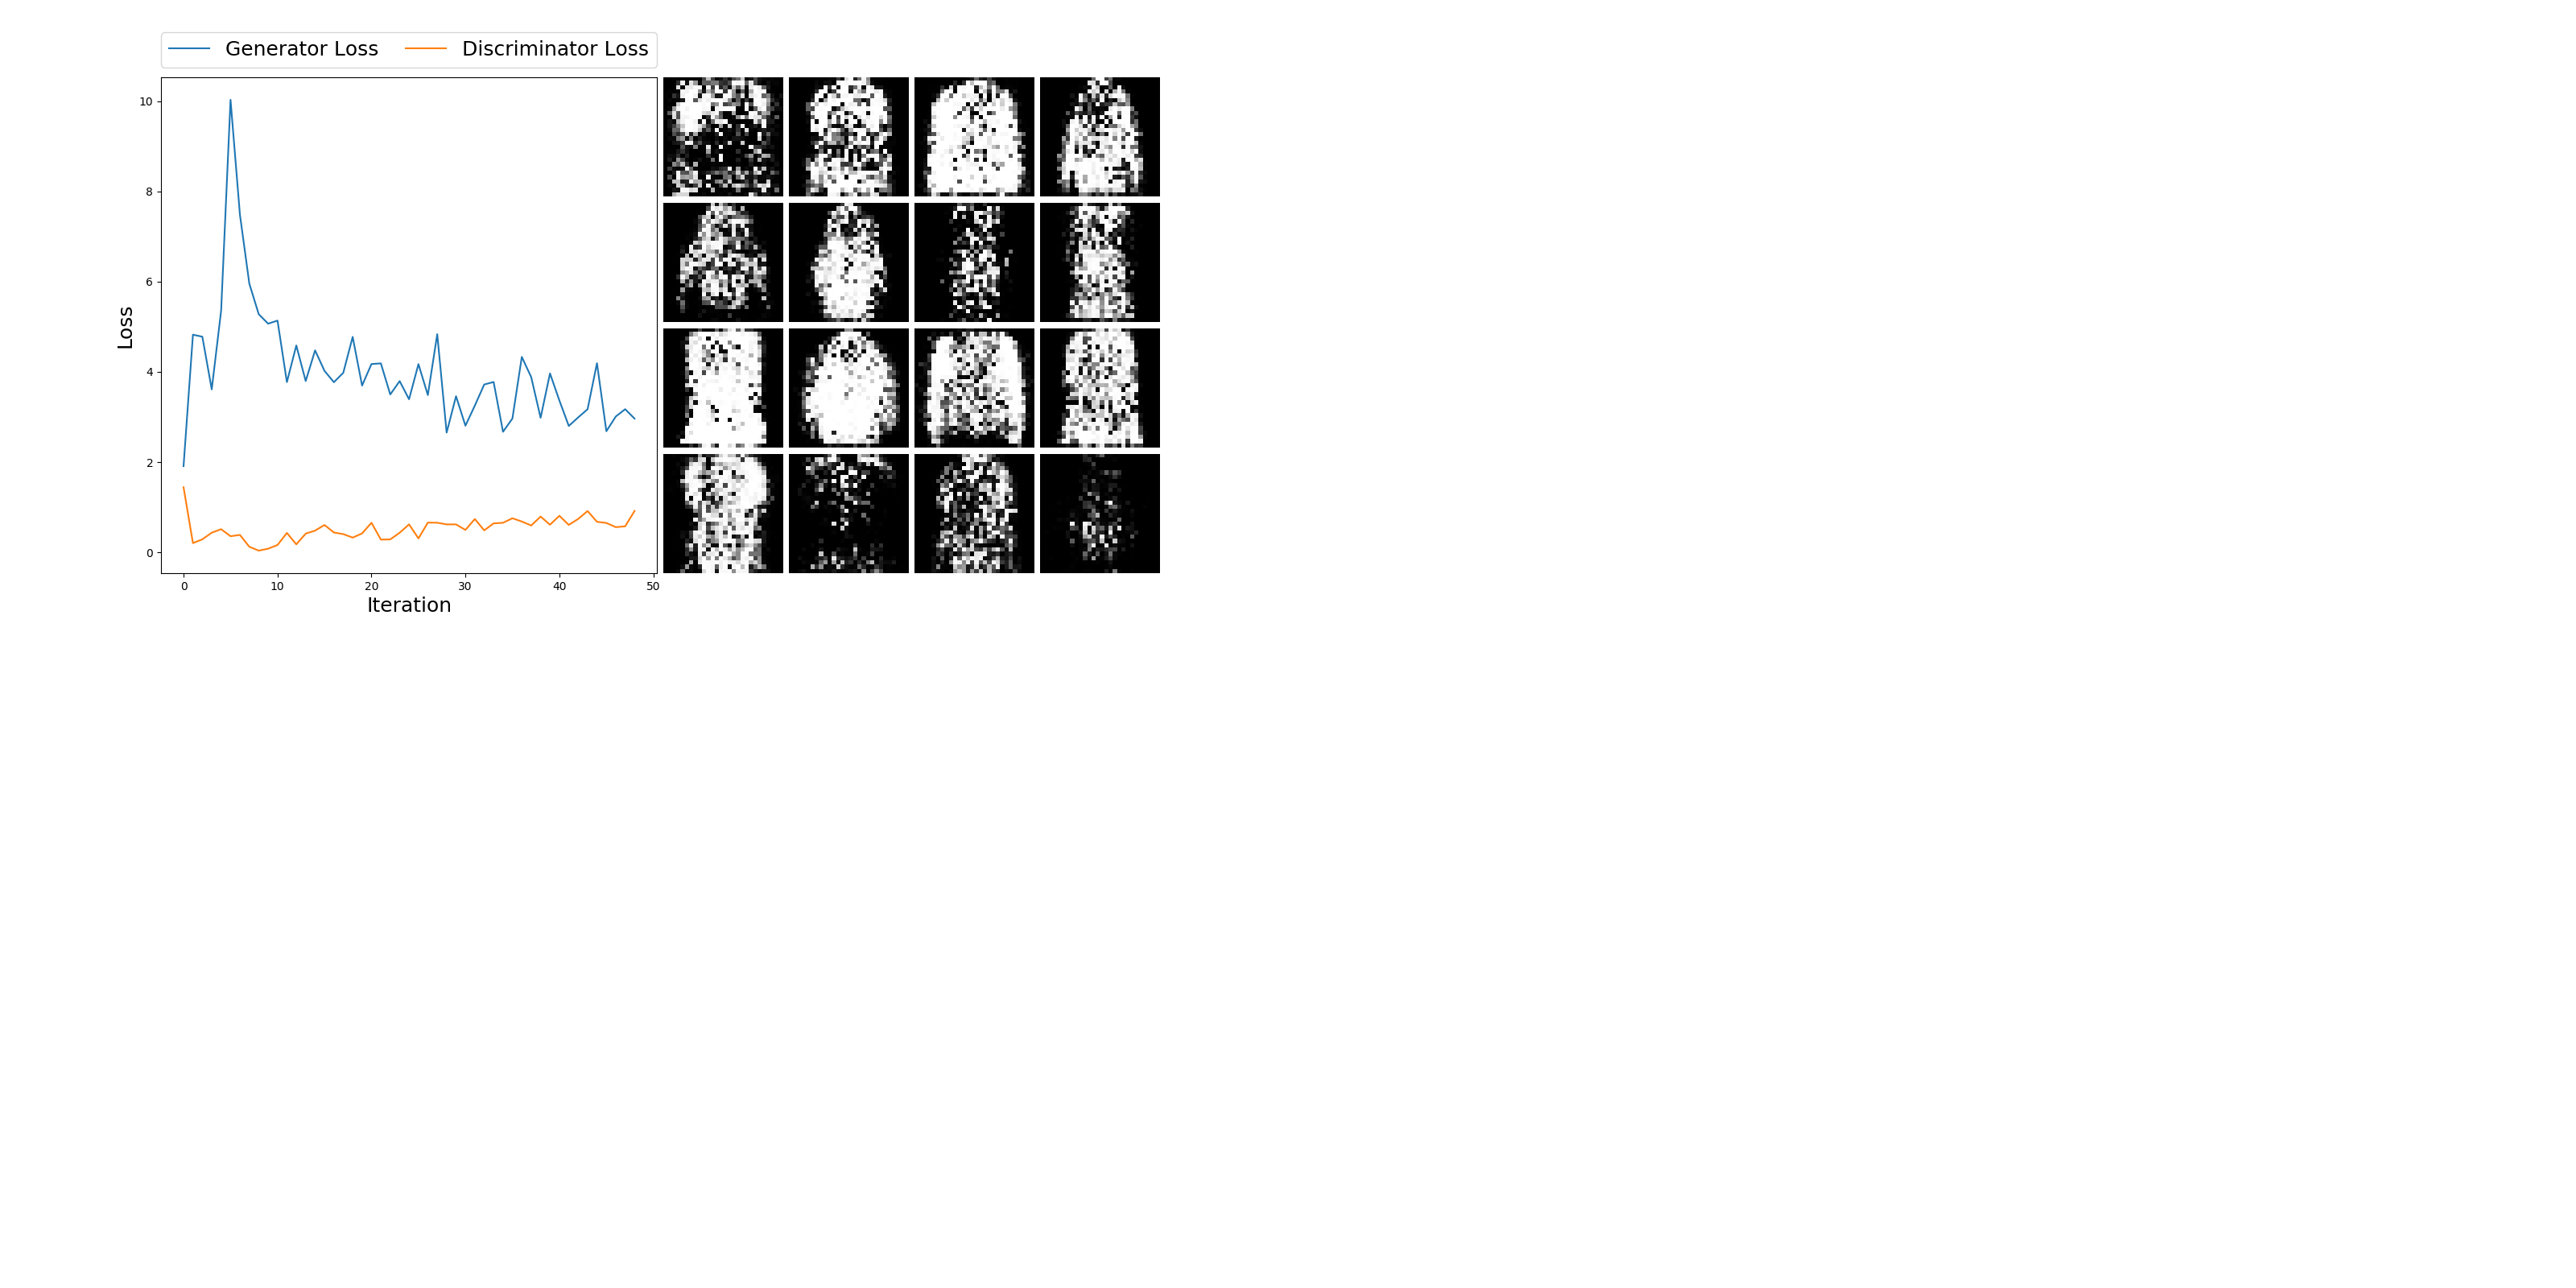

KeyboardInterrupt: 

In [51]:
t_vars = tf.trainable_variables()
theta_G = [var for var in t_vars if var.name.startswith("gen")]
theta_D = [var for var in t_vars if var.name.startswith("disc")]

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

mb_size = 128
Z_dim= 100

# Uncomment this line to switch to mnist digit dataset
# mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)
mnist = input_data.read_data_sets('data/fashion', one_hot=True)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

def plot_iter(samples, gs, mode, g_loss, d_loss):
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[int(i/mode), int(i%mode + mode)])
        ax.clear()
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
    
    ax_loss = plt.subplot(gs[:, 0:4])
    ax_loss.clear()
    ax_loss.set_ylabel("Loss", fontsize=18)
    ax_loss.set_xlabel("Iteration", fontsize=18)
    ax_loss.plot(g_loss, label="Generator Loss")
    ax_loss.plot(d_loss, label="Discriminator Loss")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=18)

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(4, 8)
gs.update(wspace=0.05, hspace=0.05)

i = 0
g_loss = []
d_loss = []

plt.ion()
for it in range(100000):
    X_mb, _ = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})

    if it % 200 == 0:
        g_loss.append(G_loss_curr)
        d_loss.append(D_loss_curr)
        
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})
        
        plot_iter(samples, gs, 4, g_loss, d_loss)
        fig.canvas.draw()

### Issues with GANs:

The alternative training of the generator and discriminator in GANs is not an easy task. It is extremely sensitive to hyper-parameters and under many conditions it might not converge to something meaningful or not converge at all. In this section we briefly discuss some of the issues with the standard GAN. Many varieties of GANs have been proposed over the last few years that aim to resolve some of these issues. We will discuss a few of them in the next section. However, detailed discussion of these methods is beyond the scope of this module. The __[GAN Zoo](https://github.com/hindupuravinash/the-gan-zoo)__ on GitHub maintains a rather comprehensive list of GANs that can be used as a reference.

So here are some of the problems:
- **Mode Collapse:** Mode collapse happens when the generator finds an optimal point and generates the same image over and over. A full collapse is rare but partial collapse is very common. In partial collapse, many of the generated samples look very similar (e.g.: In our demo example the model only generates a particular pictures of a shoe) . There has been a lot of work in penalizing the generator if it produces images with low diversity. __[Minibatch discrimination](https://arxiv.org/pdf/1606.03498)__ is one such technique. The argument here is that because the discriminator examines each sample independently, there is no mechanism for it to judge on the diversity of the generated images and hence no way for it to force the generator to produce more dissimilar instances. Minibatch discrimination mitigates this by allowing the discriminator to examine a batch of samples at a time and calculate a distance measure between them that can aid its decision in classifying a sample as real or fake. __[Wasserstein GAN](https://arxiv.org/pdf/1701.07875)__ is another work that results in diversification of generated samples.

- **Non-convergance:** Using gradient descent in order to train two networks in an adversarial way might lead to a case where the scores for the two players oscillate back and forth without any overall convergence towards a goal state.

- **Vanishing Gradient:** A common problem for gradient descent can show itself in a destructive way in training GANs as well. Specially at the beginning of the training when the generator is not yet producing anything that resembles a proper instance, it might get stuck at a low gradient regime. This leads to very slow rate of training specially at the beginning.

### Deep convolutional generative adversarial networks (DCGAN)
__[deep convolutional generative adversarial networks (DCGANs)](https://arxiv.org/pdf/1511.06434.pdf)__ impose a set of constraints on the architecture of the Convolutional GANs to stabilize their training. In their paper, Radford et al. showed that they can use the generator to generate new (unmemoized) samples, but they showed that the discriminator show high representation learning capacity and can be used as a feature extractor for other supervised learning classifiers. The following figure shows the architecture of a DCGAN:

<figure>
    <img src='gan_img/DCGAN.png' width="800">
    <figcaption><center>[<b>Image credit:</b> Radford, A., Metz, L., & Chintala, S. (2015). </center><center>Unsupervised representation learning with deep convolutional generative adversarial networks. arXiv preprint arXiv:1511.06434.</center></figcaption>
</figure>

<p>The input is a 100 dimensional uniform distribution that is passed through a series of four fractionally-strided convolutions and finally then converted to a 64 × 64 pixel image. No fully-connected or pooling layers are used. Here are some samples that are generated using the trained generator:</p>

<p>
<figure>
    <img src='gan_img/DCGAN_results.png' width="600">
    <figcaption><center>Generated bedrooms after five epochs of training.</center><center>[<b>Image credit:</b> Radford et al. (2015). </center><center>Unsupervised representation learning with deep convolutional generative adversarial networks.]</center></figcaption>
</figure>
</p>




### Conditional GAN

In our demo by training a GAN we managed to generate images from the MNIST dataset, however we did not have any control over the class (label) of the image that was produced ('shirt', 'shoe', etc.) Conditional GANs solve this issue by bringing the labels into the system. The labels act as a helper to the discriminator, so that it can have a more guided decision to make. For example it can easily dismiss an image resembling '1' as fake, if the accompanying label is another digit, like '4'.

In CGANs both the fake and the real images are accompanied by labels. The label for the fake images is simply sampled from a uniform distribution over the set of labels. The labels are then given passed to both the Generator and Discriminator in a one-hot-encoding fashion, for example the label for '4' will be $(0, 0, 0, 0, 1, 0, 0, 0, 0, 0)$. The cost function is the same as regular GAN, except that the likelihoods are now conditioned on the label:

<img src="gan_img/CGAN.png" width="600">

We do not have to stop there with the labels. For MNIST, we can add other labels besides the actual digit value, such as the size, style and other attributes regarding the handwritten digits and train a generator with richer set of capabilities.

### Info GAN

For the CGAN to work, we need to have access to labeled training set. If we are not that lucky, we can still use similar architecture as CGANs but ask the discriminator to help us extract the labels for us and that is how the InfoGANs work. As with CGANs, the generator is given a random label $c$, in one-hot encoding, along with the input noise of $z$. The generator $G(z, c)$ will output an image (in case of MNIST, a digit) which is then fed to the discriminator. Contrary to CGANs however, the discriminator not only has to determine the legitimacy of the image, it also has to guess the associated label for that image by producing a probability distribution $Q(c \mid x)$:

<img src="gan_img/InfoGAN.png" width="600">

As an example, suppose that the discriminator outputs $Q=(0, 0.3, 0.7, \ldots)$ for a given image (fake or real). This means that the discriminator thinks that the input was a '1' with 0.3 probability and '2' with 0.7. 

We will not get into the mathematical details here but the cost function for InfoGAN is:

<img src="gan_img/infoGAN_loss.png" id="loss_info" width="500">

The $I(c; G(z, c))$ term is subtracted from the original GAN loss. The $I(X;Y)$ is the __[Mutual Information](https://en.wikipedia.org/wiki/Mutual_information)__ between random variables $X$ and $Y$. This value measures how much we know about $X$ if we know $Y$. If this value is close or equal to zero if $X$ and $Y$ are independent. Because the generator wants to minimize the loss function, it has to make the $\lambda I(c; G(z, c))$ term larger. As a result it will try to enforce a high mutual information between the latent code $c$ and its distribution $G(z, c)$. Intuitively, the choice of $c$ should have a bearing on the "style" of the generated image $G(z, c)$. Since maximizing the mutual information is hard in practice, an approximation of it is used instead, which we will not get into the details of here. The interested reader is encouraged to look at the original __[paper](https://arxiv.org/pdf/1606.03657.pdf)__. There, after training with the above method, the authors were able to generate MNIST digits and by manipulating the latent code, change the type, rotation and the width of the generated digits:



<p>
    <figure>
    <img src="gan_img/Info_results.png" width="700">
        <figcaption><center>
            [<b>Image credit:</b> Chen, X., Duan, Y., Houthooft, R., Schulman, J., Sutskever, I., & Abbeel, P. (2016). </center><center>Infogan: Interpretable representation learning by information maximizing generative adversarial nets. </center><center>In Advances in neural information processing systems (pp. 2172-2180).]</center></figcaption>
</p>



## Resources
1. FVBN:
    - PixelRNN: https://arxiv.org/abs/1601.06759
    - PixelCNN: https://arxiv.org/abs/1606.05328
2. GAN:
    - https://arxiv.org/pdf/1701.00160.pdf
    - CGAN: https://arxiv.org/pdf/1411.1784.pdf
    - InfoGAN: https://arxiv.org/pdf/1606.03657.pdf
    - DCGAN: https://arxiv.org/pdf/1511.06434.pdf
    - WGAN: https://arxiv.org/pdf/1701.07875.pdf
    - https://arxiv.org/pdf/1606.03498.pdf
    - OpenAI Tutorial: https://blog.openai.com/generative-models/
    - GAN Lab: A greate visual source to learn GANs: https://poloclub.github.io/ganlab/
    - GAN Zoo: https://github.com/hindupuravinash/the-gan-zoo
    